In [47]:
import networkx as nx
import pandas as pd
import numpy as np
import scipy.io
import os
import re
import matplotlib.pyplot as plt
import random
from sklearn import metrics

In [2]:
name_list=[]
for i in os.listdir():
    if len(i.split('.'))>1 and i.split('.')[1]=='feat':
        name_list.append(i.split('.')[0])
name_list=set(name_list)
name_list=list(name_list)
name_list

['414', '107', '698', '0', '3980', '348', '3437', '1912', '1684', '686']

In [3]:
num_lines=0
for i in name_list:
    num_lines += sum(1 for line in open(i+".edges"))
print("#edges combining all egonets :",num_lines)
print("#edges in combined file :",sum(1 for line in open("facebook_combined.txt")))

#edges combining all egonets : 170174
#edges in combined file : 88234


In [4]:
S=set()
for line in open("0.featnames"):
    S.add(' '.join(line.split(' ')[1:]))
for name in name_list:
    T=set()
    for line in open(name+".featnames"):
        T.add(' '.join(line.split(' ')[1:]))
    S=S.intersection(T)
print("Common features from all egonnets ")
common_features=list(S)
common_features

Common features from all egonnets 


['education;type;anonymized feature 55\n',
 'gender;anonymized feature 78\n',
 'gender;anonymized feature 77\n',
 'work;start_date;anonymized feature 157\n',
 'education;concentration;id;anonymized feature 14\n',
 'locale;anonymized feature 127\n',
 'education;type;anonymized feature 54\n',
 'languages;id;anonymized feature 92\n',
 'education;type;anonymized feature 53\n',
 'work;end_date;anonymized feature 157\n']

In [5]:
Mem={}
def extract_feature_number(name,feature):
    if Mem.get((name,feature)!=None):
        return Mem.get((name,feature))
    line=re.findall("[0-9]* "+feature,open(name+".featnames").read())[0]
    Mem[(name,feature)]=int(line.split(' ')[0])
    return Mem[(name,feature)]

def rand_bin_array(K, N):
    arr = np.zeros(N)
    arr[:K]  = 1
    np.random.shuffle(arr)
    return arr

extract_feature_number('0',common_features[0])

55

In [6]:
features=[]
for name in name_list:
    for line in open(name+".feat"):
        t=line[:-1].split(' ')
        t.insert(0,name)
        features.append(t)
features

[['414',
  '573',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['414',
  '574',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '0

In [7]:
l=[i[1] for i in features]
print("total nodes :",len(l))
print("total distinct nodes :",len(list(set(l))))
l=[int(i) for i in l]
missing=[]
for i in range(4039):
    if i not in l:
        missing.append(i)
print("missing numbers :",missing)
print("max node number : ",max(l))

total nodes : 4167
total distinct nodes : 4035
missing numbers : [686, 1912, 3437, 3980]
max node number :  4038


In [8]:
A={}
for i in missing:
        A[i]=[0.0 for k in range(len(common_features))]
for i in features:
    name=i[0]
    ind=int(i[1])
    temp=[]
    for feat in common_features:
        f_ind=extract_feature_number(name,feat)+2
        temp.append(float(i[f_ind]))
        if int(i[f_ind])!=0 and int(i[f_ind])!=1:
            print("Error at ",ind)
    A[ind]=temp
print("total nodes in A :",len(A.keys()))
A

total nodes in A : 4039


{686: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 1912: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 3437: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 3980: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 573: [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 574: [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 575: [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0],
 576: [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 577: [1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 578: [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 579: [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0],
 580: [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0],
 581: [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 582: [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0],
 583: [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 584: [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 585: [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0],
 586: [0.0,

In [9]:
G = nx.Graph()
G.add_nodes_from([i for i in range(4039)])
edge_df=pd.read_csv("facebook_combined.txt",sep=' ',header=None)
for i in range(len(edge_df)):
    G.add_edge(edge_df.loc[i,0], edge_df.loc[i,1])
    G.add_edge(edge_df.loc[i,1], edge_df.loc[i,0])
Adj=nx.adjacency_matrix(G)
Adj=Adj.toarray()
Adj=Adj.astype('float')
print(np.shape(Adj))
Adj

(4039, 4039)


array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
nodes=[i for i in range(4039)]
nodes=random.choices(nodes,k=300)
nodes

[3125,
 1913,
 1461,
 3694,
 817,
 566,
 1681,
 2442,
 419,
 3047,
 3007,
 2468,
 1875,
 4009,
 2874,
 3605,
 2237,
 2161,
 2714,
 445,
 3061,
 2848,
 2368,
 1957,
 2206,
 1221,
 166,
 942,
 878,
 3645,
 3639,
 3572,
 1501,
 780,
 2640,
 2423,
 1029,
 3250,
 3479,
 1312,
 4012,
 2719,
 1077,
 3622,
 318,
 1006,
 136,
 2511,
 3089,
 598,
 102,
 1685,
 3033,
 513,
 1368,
 3652,
 3632,
 3019,
 2403,
 1268,
 3107,
 664,
 347,
 1133,
 3508,
 1537,
 1292,
 3132,
 3316,
 2000,
 2364,
 2985,
 1191,
 493,
 880,
 923,
 3066,
 1998,
 814,
 2221,
 3779,
 2683,
 2044,
 3673,
 3612,
 3502,
 3745,
 2193,
 1323,
 2448,
 1411,
 126,
 3735,
 367,
 3688,
 347,
 2729,
 1027,
 3652,
 2355,
 1542,
 3936,
 1377,
 2036,
 717,
 1144,
 2891,
 3563,
 568,
 532,
 3702,
 2327,
 1283,
 1040,
 4035,
 1772,
 2140,
 2000,
 2709,
 917,
 3137,
 2732,
 1707,
 4034,
 2201,
 3453,
 2738,
 1539,
 1591,
 2107,
 1372,
 1629,
 3496,
 1741,
 2092,
 3298,
 1277,
 2135,
 261,
 2276,
 2001,
 1186,
 3703,
 2251,
 2456,
 3740,
 1921

In [16]:
for i in range(15):
    clique=nodes[i*15:i*15+10]
    for node1 in clique:
        for node2 in clique:
            if node1!=node2:
                G.add_edge(node1,node2)

In [19]:
dist = np.linalg.norm(np.array(A[1]) - np.array(A[3]))
dist

for i in nodes[150:300]:
    random_set=random.choices(nodes,k=50)
    node_J=-1
    node_dist=0
    for d in random_set:
        dist=np.linalg.norm(np.array(A[i]) - np.array(A[d]))
        if dist>node_dist:
            node_dist=dist
            node_J=d
    A[i]=A[node_J]

In [23]:
Adj=nx.adjacency_matrix(G)
Adj=Adj.toarray()
Adj=Adj.astype('float')
print(np.shape(Adj))
Adj

(4039, 4039)


array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
#final Atribute matrix
Arr=[]
for i in range(len(A.keys())):
    Arr.append(A[i])
Arr=np.array(Arr)
print(np.shape(Arr))
Arr

(4039, 10)


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 1., 0., ..., 1., 1., 0.],
       [1., 1., 0., ..., 1., 1., 0.]])

In [49]:
temp=[0 for i in range(4039)]
print(len(nodes))
for i in nodes:
    temp[i]=1
for i in range(len(temp)):
    temp[i]=[temp[i]]
gnd=np.array(temp)
gnd=gnd.astype('float')
print(np.shape(gnd))
gnd

300
(4039, 1)


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [33]:
np.sum(gnd)

289.0

In [34]:
len(list(set(nodes)))

289

In [35]:
28900/4039

7.155236444664521

In [50]:
scipy.io.savemat("./matfiles/"+"facebook"+'.mat', mdict={'X':Arr,'A':Adj,'gnd':gnd})

In [37]:
np.save("anomalous_nodes", nodes)

# Rough Work

In [38]:
labels=[]
with open('facebook-ranking.txt') as fb:
    a=fb.readlines()
    labels=[int(i[0]) for i in a]

In [41]:
detected_anomalies=np.array(labels)

In [45]:
skplt.metrics.plot_roc_curve(gnd, detected_anomalies)

NameError: name 'skplt' is not defined

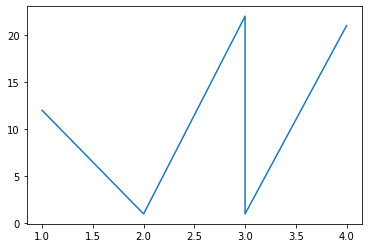

In [51]:
fpr=[1,2,3,3,4]
tpr=[12,1,22,1,21]

import matplotlib.pyplot as plt

plt.plot(fpr,tpr)